In [7]:
import numpy as np
import mne as mne
import matplotlib.pyplot as plt

ELECTRODES_NUM = 35
root_folder = r"C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss"

train_ICS = np.load('./data/train_ICS.npy')
test_ICs = np.load('./data/test_ICs.npy')
train_labels = np.load('./data/train_labels.npy')
test_labels = np.load('./data/test_labels.npy')
test_labels = np.load('./data/test_labels.npy')
train_ica_mixing_matrix = np.load('./data/train_ICA_mixing_matrix.npy')
train_ica_unmixing_matrix = np.load('./data/train_ICA_unmixing_matrix.npy')
train_set = mne.io.read_epochs_eeglab(root_folder + r'\data\train_set.set')
test_set = mne.io.read_epochs_eeglab(root_folder + r'\data\test_set.set')
eeglab_epochs_with_location = mne.io.read_epochs_eeglab(root_folder + r'\data\35_electrodes_filtered_epoched_with_locations.set')


Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\train_set.set...
Not setting metadata
368 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\test_set.set...
Not setting metadata
92 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from C:\Users\alonb\OneDrive - Technion\טכניון\סמסטר ט' - אביב 2022\פרוייקט א\eeg-bss\data\35_electrodes_filtered_epoched_with_locations.set...
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [3]:
average_in_time_ICS = []
for ic in train_ICS:
    average_in_time_ICS.append(np.mean(ic, axis=0))
average_in_time_ICS = np.array(average_in_time_ICS)
electrodes_avg_in_time = train_ica_mixing_matrix @ average_in_time_ICS


(35, 500)


Fitting ICA to data using 35 channels (please be patient, this may take a while)


C:\Users\alonb\AppData\Local\Temp\ipykernel_19288\3826647944.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(eeglab_epochs_with_location)


Selecting by number: 35 components
Fitting ICA took 65.0s.


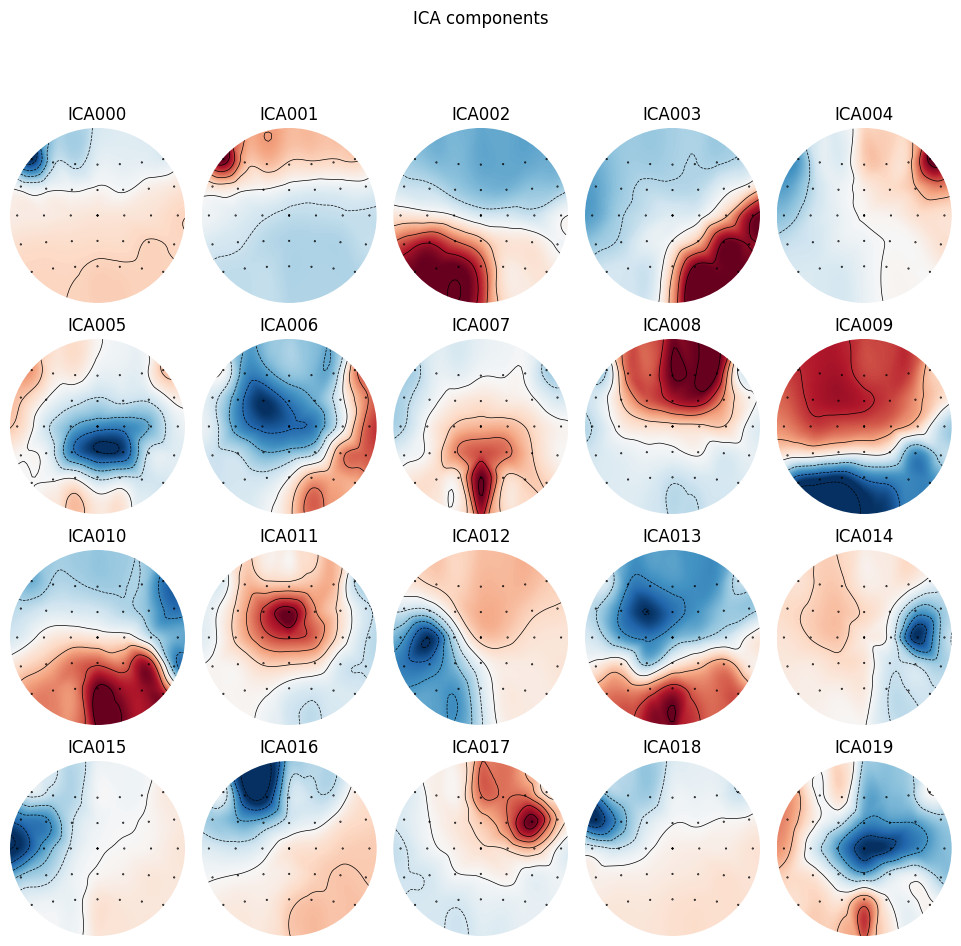

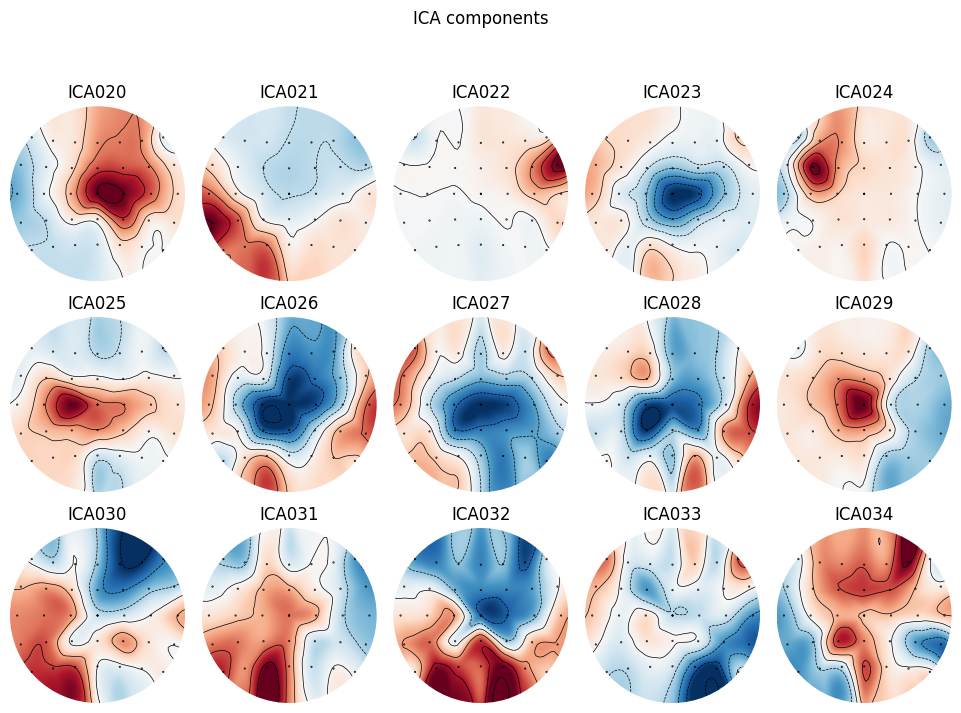

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x731.5 with 15 Axes>]

In [9]:
ica = mne.preprocessing.ICA(n_components = ELECTRODES_NUM, method='picard')
ica.fit(eeglab_epochs_with_location)
mne.viz.plot_ica_components(ica)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
460 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


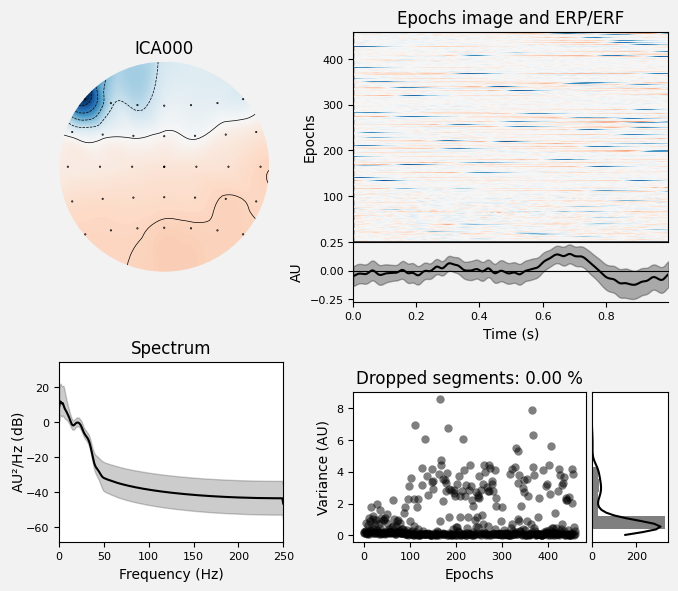

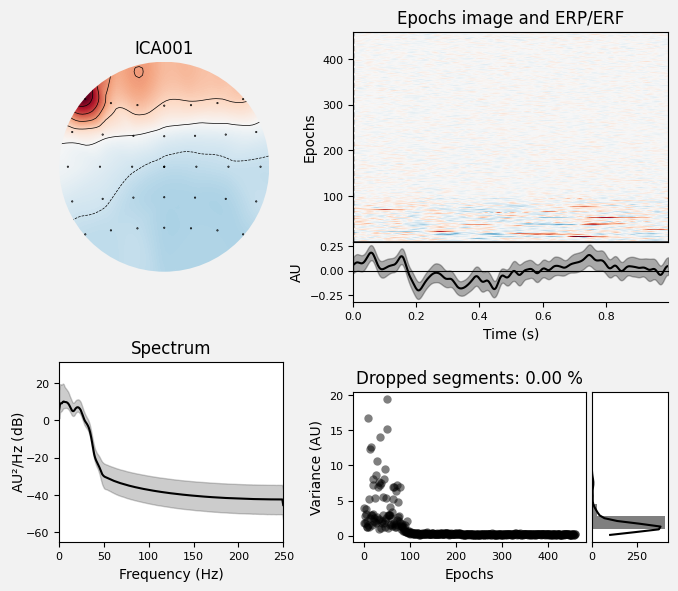

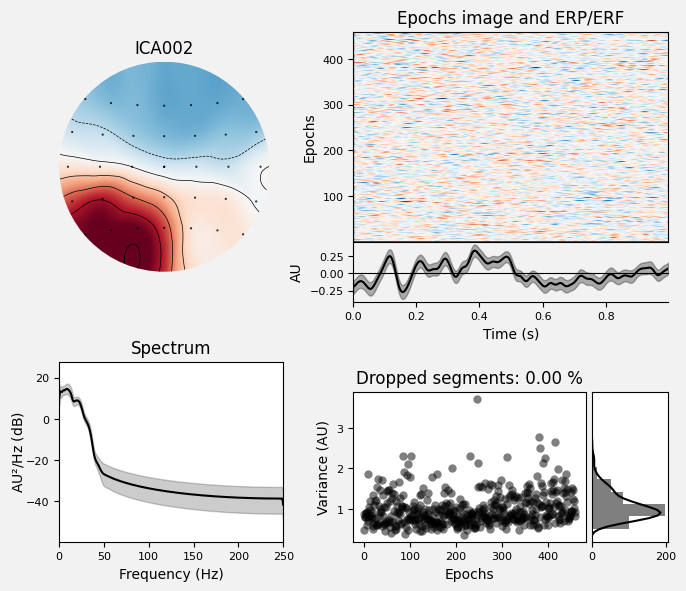

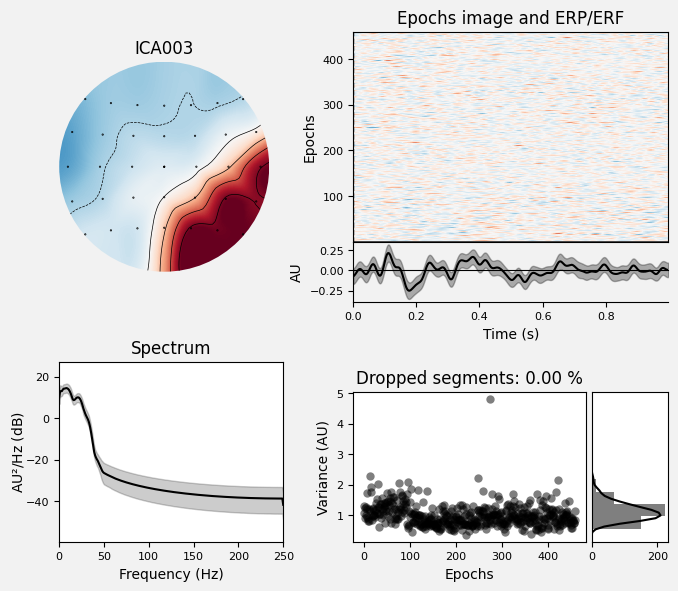

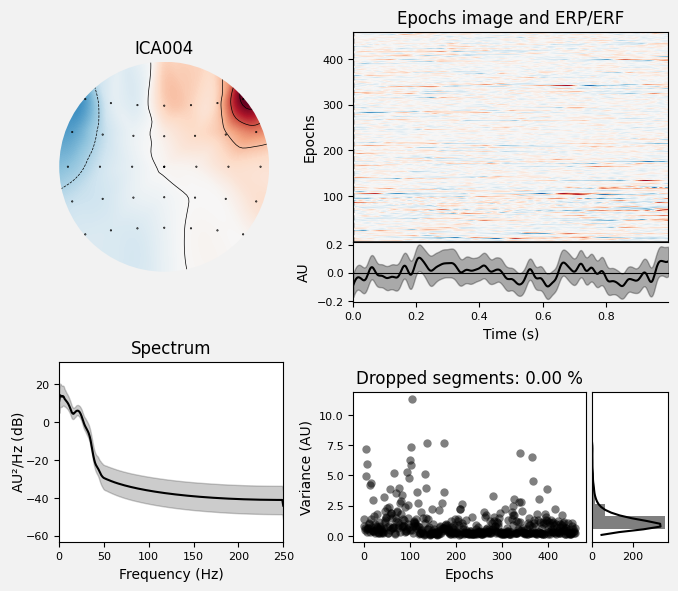

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [11]:
mne.viz.plot_ica_properties(ica, eeglab_epochs_with_location, )